In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import sklearn
sklearn.__version__

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import math
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.svm import SVR

In [2]:
arr = pd.read_csv("arrival_merged.csv", delimiter = ',')
arr.head(5)

,Unnamed: 0,V1,CarrierCode,date,FlightNumber,TailNumber,OriginAirport,ScheduledArrivalTime,ActualArrivalTime,ScheduledElapsedTimeMinutes,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,0,9,AA,2016-01-01,1116,N005AA,LAX,6:13:00,5:57:00,253,...,0,15,22,87,0.0,1023,3,10,317,11
1,1,57876,DL,2016-01-01,1098,N127DL,SFO,6:20:00,6:11:00,265,...,0,15,22,87,0.0,1023,3,10,317,11
2,2,57917,DL,2016-01-01,1254,N551NW,LAX,6:00:00,5:47:00,245,...,0,15,22,87,0.0,1023,3,10,317,11
3,3,57943,DL,2016-01-01,1354,N1611B,LAX,6:54:00,6:41:00,244,...,0,15,22,87,0.0,1023,3,10,317,11
4,4,1106367,NK,2016-01-01,806,N506NK,LAS,6:20:00,6:19:00,230,...,0,15,22,87,0.0,1023,3,10,317,11


In [3]:
arr.drop("Unnamed: 0", axis=1, inplace=True)
arr.shape

(1288202, 44)

In [4]:
arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288202 entries, 0 to 1288201
Data columns (total 44 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   V1                                  1288202 non-null  int64  
 1   CarrierCode                         1288202 non-null  object 
 2   date                                1288202 non-null  object 
 3   FlightNumber                        1288202 non-null  int64  
 4   TailNumber                          1288202 non-null  object 
 5   OriginAirport                       1288202 non-null  object 
 6   ScheduledArrivalTime                1288202 non-null  object 
 7   ActualArrivalTime                   1288202 non-null  object 
 8   ScheduledElapsedTimeMinutes         1288202 non-null  int64  
 9   ActualElapsedTimeMinutes            1288202 non-null  int64  
 10  ArrivalDelayMinutes                 1288202 non-null  int64  
 11  WheelsonTim

In [5]:
# Finding and extracting the canceled flights
canceled_data = arr[arr['TailNumber']==' ']
print("Number of canceled flights: ", canceled_data.shape[0])

arr_non_canceled = arr[arr['TailNumber']!=' ']  # Extracting non-canceled flights
print("\n")
print("Shape of non_canceled data: ", arr_non_canceled.shape)

Number of canceled flights:  8842


Shape of non_canceled data:  (1279360, 44)


In [6]:
arr_non_canceled.drop(['V1','date', 'ScheduledArrivalTime', 'ActualArrivalTime', 'ScheduledElapsedTimeMinutes', 'ActualElapsedTimeMinutes', 'WheelsonTime', 'moonrise', 'moonset','sunrise','sunset'], axis = 1, inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
arr_non_canceled.ArrivalAirport = pd.Categorical(arr_non_canceled.ArrivalAirport)
arr_non_canceled['ArrivalAirport_code'] = arr_non_canceled.ArrivalAirport.cat.codes

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-7-f1648e9b670c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_non_canceled['ArrivalAirport_code'] = arr_non_canceled.ArrivalAirport.cat.codes


In [8]:
arr_non_canceled.CarrierCode = pd.Categorical(arr_non_canceled.CarrierCode)
arr_non_canceled['CarrierCode_code'] = arr_non_canceled.CarrierCode.cat.codes

<ipython-input-8-b779480dc607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_non_canceled['CarrierCode_code'] = arr_non_canceled.CarrierCode.cat.codes


In [9]:
arr_non_canceled.OriginAirport = pd.Categorical(arr_non_canceled.OriginAirport)
arr_non_canceled['OriginAirport_code'] = arr_non_canceled.OriginAirport.cat.codes

<ipython-input-9-f6772c07b9d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_non_canceled['OriginAirport_code'] = arr_non_canceled.OriginAirport.cat.codes


In [10]:
arr_non_canceled.drop(['ArrivalAirport', 'CarrierCode', 'OriginAirport', 'TailNumber'], axis=1, inplace=True)

In [11]:
arr_non_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279360 entries, 0 to 1288201
Data columns (total 32 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   FlightNumber                        1279360 non-null  int64  
 1   ArrivalDelayMinutes                 1279360 non-null  int64  
 2   TaxiIntimeMinutes                   1279360 non-null  int64  
 3   DelayCarrierMinutes                 1279360 non-null  int64  
 4   DelayWeatherMinutes                 1279360 non-null  int64  
 5   DelayNationalAviationSystemMinutes  1279360 non-null  int64  
 6   DelaySecurityMinutes                1279360 non-null  int64  
 7   DelayLateAircraftArrivalMinutes     1279360 non-null  int64  
 8   time                                1279360 non-null  int64  
 9   city                                1279360 non-null  int64  
 10  maxtempC                            1279360 non-null  int64  
 11  mintempC   

In [12]:
arr_airline = arr_non_canceled.iloc[:, 0:10]

In [13]:
arr_airline['ArrivalAirport_code'] = arr_non_canceled['ArrivalAirport_code']
arr_airline['CarrierCode_code'] = arr_non_canceled['CarrierCode_code']
arr_airline['OriginAirport_code'] = arr_non_canceled['OriginAirport_code']

In [14]:
arr_airline.shape

(1279360, 13)

In [15]:
arr_airline.head(5)

,FlightNumber,ArrivalDelayMinutes,TaxiIntimeMinutes,DelayCarrierMinutes,DelayWeatherMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,time,city,ArrivalAirport_code,CarrierCode_code,OriginAirport_code
0,1116,-16,9,0,0,0,0,0,6,30320,0,0,5
1,1098,-9,8,0,0,0,0,0,6,30320,0,2,9
2,1254,-13,5,0,0,0,0,0,6,30320,0,2,5
3,1354,-13,6,0,0,0,0,0,6,30320,0,2,5
4,806,-1,32,0,0,0,0,0,6,30320,0,3,4


In [16]:
target = arr_airline['ArrivalDelayMinutes']
arr_airline.drop('ArrivalDelayMinutes', axis=1, inplace=True)

In [17]:
target[target < 15]= 0
target[target >= 15]= 1
target.value_counts()

<ipython-input-17-4e5993a2f2c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[target < 15]= 0
<ipython-input-17-4e5993a2f2c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[target >= 15]= 1


0    1044636
1     234724
Name: ArrivalDelayMinutes, dtype: int64

In [18]:
arr_airline.drop(['FlightNumber', 'city'], axis=1, inplace=True)
arr_airline.head(5)

,TaxiIntimeMinutes,DelayCarrierMinutes,DelayWeatherMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,time,ArrivalAirport_code,CarrierCode_code,OriginAirport_code,ArrivalDelayMinutes
0,9,0,0,0,0,0,6,0,0,5,0
1,8,0,0,0,0,0,6,0,2,9,0
2,5,0,0,0,0,0,6,0,2,5,0
3,6,0,0,0,0,0,6,0,2,5,0
4,32,0,0,0,0,0,6,0,3,4,0


In [19]:
arr_airline.drop('ArrivalDelayMinutes', axis=1, inplace=True)
arr_airline.head(5)

,TaxiIntimeMinutes,DelayCarrierMinutes,DelayWeatherMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,time,ArrivalAirport_code,CarrierCode_code,OriginAirport_code
0,9,0,0,0,0,0,6,0,0,5
1,8,0,0,0,0,0,6,0,2,9
2,5,0,0,0,0,0,6,0,2,5
3,6,0,0,0,0,0,6,0,2,5
4,32,0,0,0,0,0,6,0,3,4


In [60]:
#from sklearn.preprocessing import StandardScaler as scaler
#data_scaled = scaler().fit_transform(arr_airline)

#data_scaled = pd.DataFrame(data_scaled)
#data_scaled.columns = arr_airline.columns

In [20]:

X_train, X_val, y_train, y_val = train_test_split(arr_airline, target, test_size=0.30, random_state=1762)


In [21]:
"""
The function classification_models fit the model with the best parameters. Calculates the model accuracy score 
on both training and validation sets. Displays the confusion matrix and computes the classification report to 
measure the performance of the model on the validation set.

The functions RandomForest_Hypermarameter, SVC_Hypermarameter, Decision_Tree_model_hp, AdaBoost_model_hp identifies
the best parameters and calls the classification_models to compute the statistics. 


"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import SVC

def classification_models(X_train, y_train, X_val, y_val, hp = False, RandomForest = False, NB = False, GBC = False, XGB = False, DT = False, AdaBoost = False):
    """
Returns the model accuracy on train and validation data. Plots the confusion matrix and print classification reprt.
      
      Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
                  hp (boolean): Set true to fit model with best parameters
                  RandomForest: Set true to fit the RandomForest model
                  SVC_RBF:  Set true to fit the RBF kernel SVC model
                  SVC_linear: Set true to fit the Linear kernel SVC model
                  SVC_polynomial: Set true to fit the Polynomial kernel SVC model
                  DT: Set true to fit the Decision tree model
                  AdaBoost: Set true to fit the AdaBoost model
  """
    if(hp == False):
        if (RandomForest == True):
            model = RandomForestClassifier()    # Fit default RandomForest model
            model.fit(X_train, y_train)
        elif (NB == True):
            model = GaussianNB()         # Fit default Naive Bayes model
            model.fit(X_train, y_train)
        elif (GBC == True):
            model = GradientBoostingClassifier()       # Fit default Gradient boosting model
            model.fit(X_train, y_train)
        elif (XGB == True):
            model = XGBClassifier()        # Fit default XGB model
            model.fit(X_train, y_train)
        elif (DT == True):
            model = DecisionTreeClassifier()    # Fit default Decision tree model
            model.fit(X_train, y_train)
        elif (AdaBoost == True):              # Fit default AdaBoost model
            model = AdaBoostClassifier()
            model.fit(X_train, y_train)

    else:
        if (RandomForest == True):
            max_depth_input = int(input('Enter max_depth: '))
            min_samples_split_input = int(input('Enter min_samples_split: '))
      
      # Fit the RandomForest model with best parameters
            model = RandomForestClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
            model.fit(X_train, y_train)   
        elif (DT == True):
            max_depth_input = int(input('Enter max_depth: '))
            min_samples_split_input = int(input('Enter min_samples_split: '))

      # Fit the RandomForest model with best parameters
            model = DecisionTreeClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
            model.fit(X_train, y_train)
        elif (AdaBoost == True):
            learning_rate_input = float(input('Enter Optimal learning rate: '))

      # Fit the AdaBoost classifier with optimal learning rate
            model = AdaBoostClassifier(n_estimators=100, learning_rate=learning_rate_input)
            model.fit(X_train, y_train)
        elif (GBC == True):
            learning_rate_input = float(input('Enter Optimal learning rate: '))
        
        # Fit the Gradient Boosting classifier with optimal learning rate
            model = GradientBoostingClassifier(n_estimators = 100, learning_rate=learning_rate_input)
            model.fit(X_train, y_train)
        elif (XGB == True):
            max_depth_input = int(input('Enter max_depth: '))
            learning_rate_input = float(input('Enter Optimal learning rate: '))
        
        # Fit XGB with optimal parameters
            model = XGBClassifier(learning_rate = learning_rate_input, max_depth = max_depth_input)
            model.fit(X_train, y_train)
        

    model_pred_train = model.predict(X_train)  # Predict and calculate accuracy on train data
    print('Accuracy score of train data: ', metrics.accuracy_score(y_true = y_train, y_pred = model_pred_train))
    print('\n')

    model_pred_test = model.predict(X_val)    # Predict and calculate accuracy on validation data
    print('Accuracy score of test data: ', metrics.accuracy_score(y_true = y_val, y_pred = model_pred_test))
    print('-------------------------------------------------------------------------------------------------------------------')

  #Confusion matrix
    confusion_matrix =  pd.crosstab(index=y_val, columns=model_pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    print(confusion_matrix)
    plt.title("Confusion Matrix for test data", fontsize = 15)
    plt.show()

  # Print classification report
    print('Classification report of default Random forest model: ')
    print(metrics.classification_report(y_val, model_pred_test))



def RandomForest_Hypermarameter(X_train, y_train, X_val, y_val):
    """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
    """
    RF_hp = RandomForestClassifier()
    parameters = {
        'max_depth': [2,4,6,8,10],
        'min_samples_split': [8,10,12,14,16,20]
  }
    GSC = GridSearchCV(RF_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of RandomForest model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, RandomForest = True)



def Decision_Tree_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    DT_hp = DecisionTreeClassifier()
    parameters = {
        'max_depth': [2,4,6,8,10],
        'min_samples_split': [8,10,12,14,16,20]
  }
    GSC = GridSearchCV(DT_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of Decision Trees model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, DT = True)


def AdaBoost_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal learning rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    AB_hp = AdaBoostClassifier()
    parameters = {
        'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}
    GSC = GridSearchCV(AB_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of AdaBoost model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, AdaBoost = True)


def GradientBoosting_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal learning rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    GBC_hp = GradientBoostingClassifier()
    parameters = {
        'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}
    GSC = GridSearchCV(GBC_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of Gradient Boosting model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, GBC = True)
    

def XGB_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal max_depth and learning_rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    xgb_hp = XGBClassifier()
    parameters = {
        'max_depth': [2,4,6,8,10],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1]
  }
    GSC = GridSearchCV(xgb_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of XBG model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, XGB = True)

Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1               0  70657


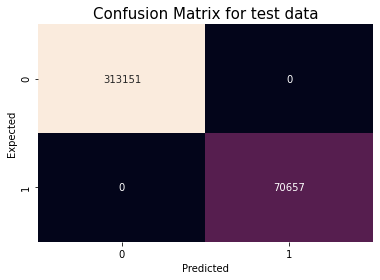

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313151
           1       1.00      1.00      1.00     70657

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [121]:
# Initiating default Random Forest classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, RandomForest = True)


Accuracy score of train data:  0.9999843671835918


Accuracy score of test data:  0.9999713398365849
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313140     11
1               0  70657


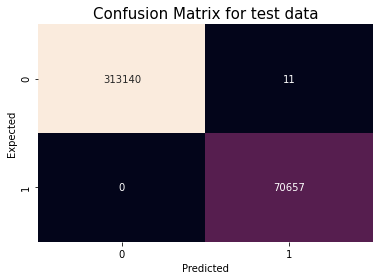

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313151
           1       1.00      1.00      1.00     70657

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [109]:
# Initiating default Naive Bayes Classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, NB = True)


Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1               0  70657


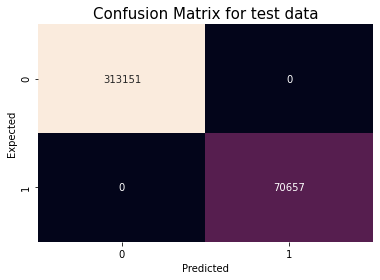

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313151
           1       1.00      1.00      1.00     70657

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [122]:
# Initiating default Gradient Boosting Classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, GBC = True)


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1               0  70657


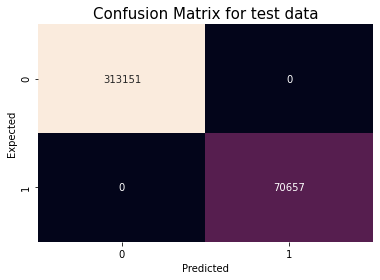

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313151
           1       1.00      1.00      1.00     70657

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [123]:
# Initiating default XGB classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, XGB = True)


Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1               0  70657


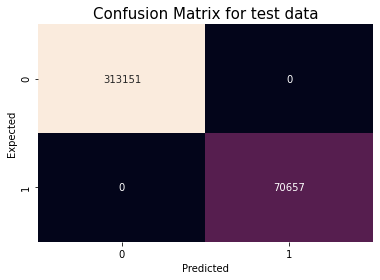

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313151
           1       1.00      1.00      1.00     70657

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [124]:
# Initiating Decision tree classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, DT = True)


Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313380      0
1               0  70428


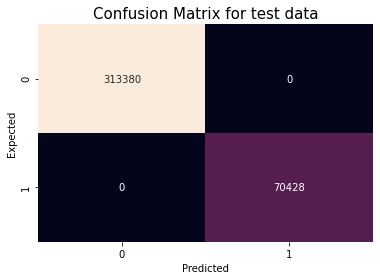

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313380
           1       1.00      1.00      1.00     70428

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [55]:
# Initiating AdaBoost Classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, AdaBoost = True)


## Hyperparameter Tuning

Best parameters of RandomForest model:  {'max_depth': 2, 'min_samples_split': 8}
Enter max_depth: 2
Enter min_samples_split: 8
Accuracy score of train data:  0.9828251179161009


Accuracy score of test data:  0.9824964565616141
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1            6718  63939


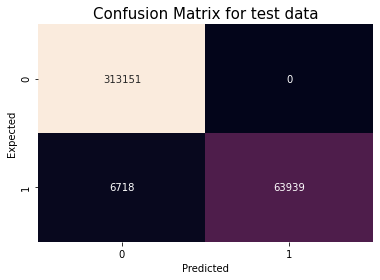

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    313151
           1       1.00      0.90      0.95     70657

    accuracy                           0.98    383808
   macro avg       0.99      0.95      0.97    383808
weighted avg       0.98      0.98      0.98    383808



In [125]:
RandomForest_Hypermarameter(X_train, y_train, X_val, y_val)

Best parameters of Decision Trees model:  {'max_depth': 2, 'min_samples_split': 8}
Enter max_depth: 2
Enter min_samples_split: 8
Accuracy score of train data:  0.9801429732723504


Accuracy score of test data:  0.9798154285476072
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1            7747  62910


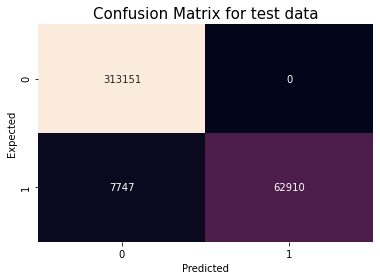

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    313151
           1       1.00      0.89      0.94     70657

    accuracy                           0.98    383808
   macro avg       0.99      0.95      0.96    383808
weighted avg       0.98      0.98      0.98    383808



In [82]:
Decision_Tree_model_hp(X_train, y_train, X_val, y_val)

Best parameters of AdaBoost model:  {'learning_rate': 0.0001}
Enter Optimal learning rate: 0.0001
Accuracy score of train data:  0.9319804991781605


Accuracy score of test data:  0.9316871977655494
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1           26219  44438


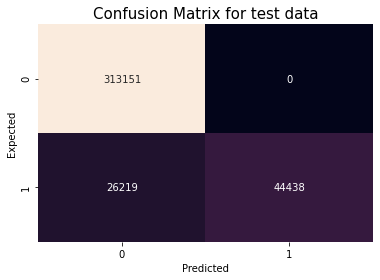

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    313151
           1       1.00      0.63      0.77     70657

    accuracy                           0.93    383808
   macro avg       0.96      0.81      0.87    383808
weighted avg       0.94      0.93      0.93    383808



In [83]:
AdaBoost_model_hp(X_train, y_train, X_val, y_val)

Best parameters of Gradient Boosting model:  {'learning_rate': 0.01}
Enter Optimal learning rate: 0.01
Accuracy score of train data:  0.9977689737726005


Accuracy score of test data:  0.997701975987994
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313151      0
1             882  69775


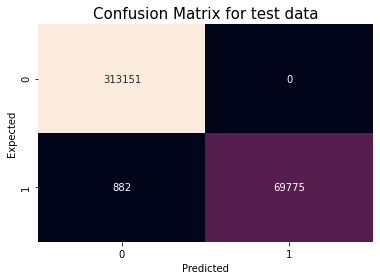

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313151
           1       1.00      0.99      0.99     70657

    accuracy                           1.00    383808
   macro avg       1.00      0.99      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [22]:
GradientBoosting_model_hp(X_train, y_train, X_val, y_val)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:35:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters of XBG model:  {'learning_rate': 0.0001, 'max_depth': 2}
Enter max_depth: 2
Enter Optimal learning rate: 0.0001
[22:38:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of train data:  0.9801429732723504


Accuracy score of test data:  0.9798154285476072
-------------------------------------------------

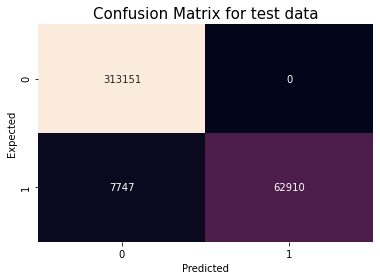

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    313151
           1       1.00      0.89      0.94     70657

    accuracy                           0.98    383808
   macro avg       0.99      0.95      0.96    383808
weighted avg       0.98      0.98      0.98    383808



In [24]:
XGB_model_hp(X_train, y_train, X_val, y_val)

In [110]:
# b) Mlxtend Feature selection technique
# Identifying top 25 most significant columns

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 8)
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.5s finished

[2021-05-31 12:47:41] Features: 1/5 -- score: 0.9319805005367297[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.8s finished

[2021-05-31 12:47:49] Features: 2/5 -- score: 0.9801429733083611[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.2s finished

[2021-05-31 12:47:57] Features: 3/5 -- score: 0.9977689734284503[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [111]:
# List of top 5 columns selected by MLXtend

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 5]


In [112]:
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=15, max_depth = 2, min_samples_split = 8)
rnd_clf.fit(X_train, y_train)
for name, importance in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

TaxiIntimeMinutes = 0.023423885388412016
DelayCarrierMinutes = 0.24725333864175958
DelayWeatherMinutes = 0.09097115540328318
DelayNationalAviationSystemMinutes = 0.44008079201022615
DelaySecurityMinutes = 0.000850467899147354
DelayLateAircraftArrivalMinutes = 0.19108033026271104
time = 0.005091556671451041
ArrivalAirport_code = 0.001160148746574496
CarrierCode_code = 6.3761843167560535e-06
OriginAirport_code = 8.194879211843186e-05


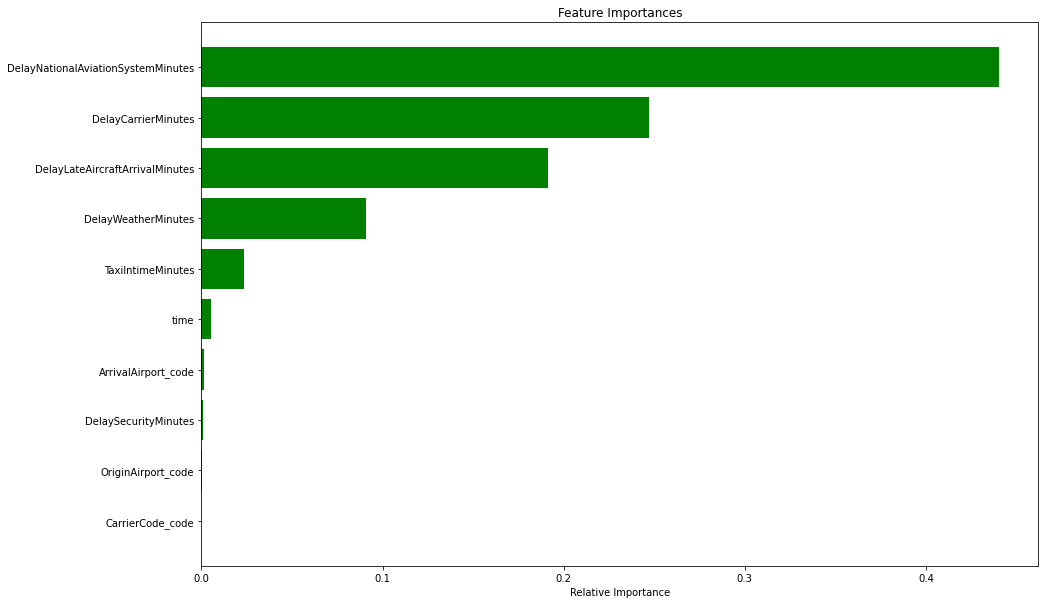

In [113]:
features = X_train.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [114]:
dt_clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 8)
dt_clf.fit(X_train, y_train)
for name, importance in zip(X_train.columns, dt_clf.feature_importances_):
    print(name, "=", importance)

TaxiIntimeMinutes = 0.0
DelayCarrierMinutes = 0.29029732460171354
DelayWeatherMinutes = 0.014074316036765388
DelayNationalAviationSystemMinutes = 0.5808546448428016
DelaySecurityMinutes = 0.0
DelayLateAircraftArrivalMinutes = 0.11477371451871932
time = 0.0
ArrivalAirport_code = 0.0
CarrierCode_code = 0.0
OriginAirport_code = 0.0


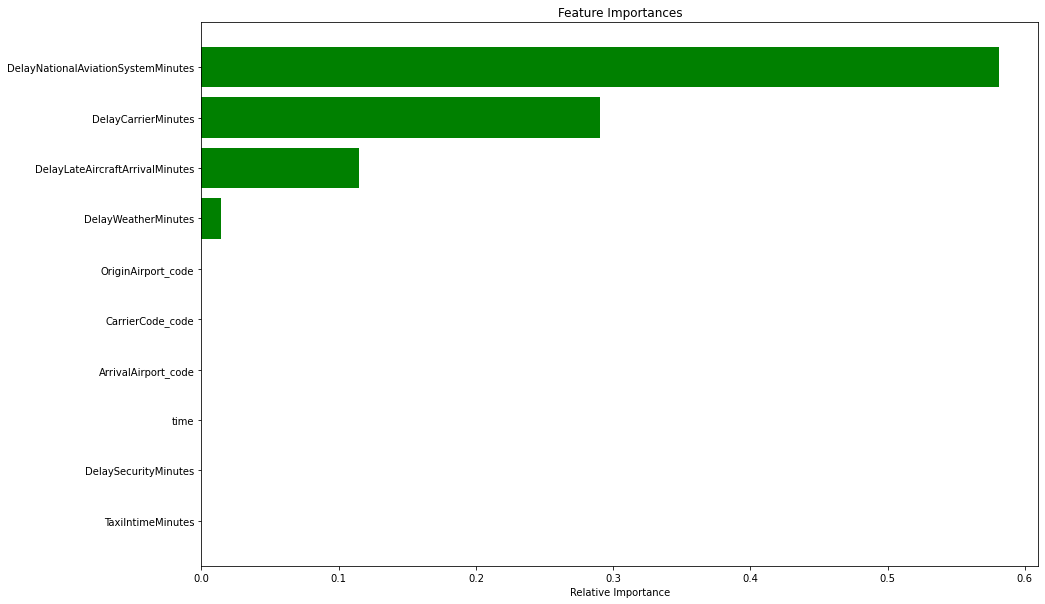

In [115]:
features = X_train.columns
importances = dt_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Predicted       0      1
Expected                
0          313151      0
1              53  70604


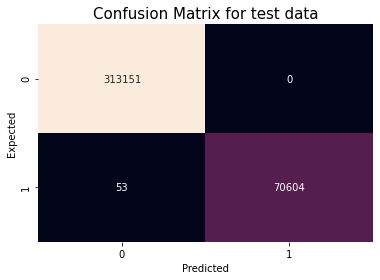

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313151
           1       1.00      1.00      1.00     70657

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [119]:
# Build decision tree classifier with top 5 selected features
clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 8)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
#print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_val)
#print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

confusion_matrix =  pd.crosstab(index=y_val, columns=y_test_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
print(confusion_matrix)
plt.title("Confusion Matrix for test data", fontsize = 15)
plt.show()

print('Classification report of default Random forest model: ')
print(metrics.classification_report(y_val, y_test_pred))

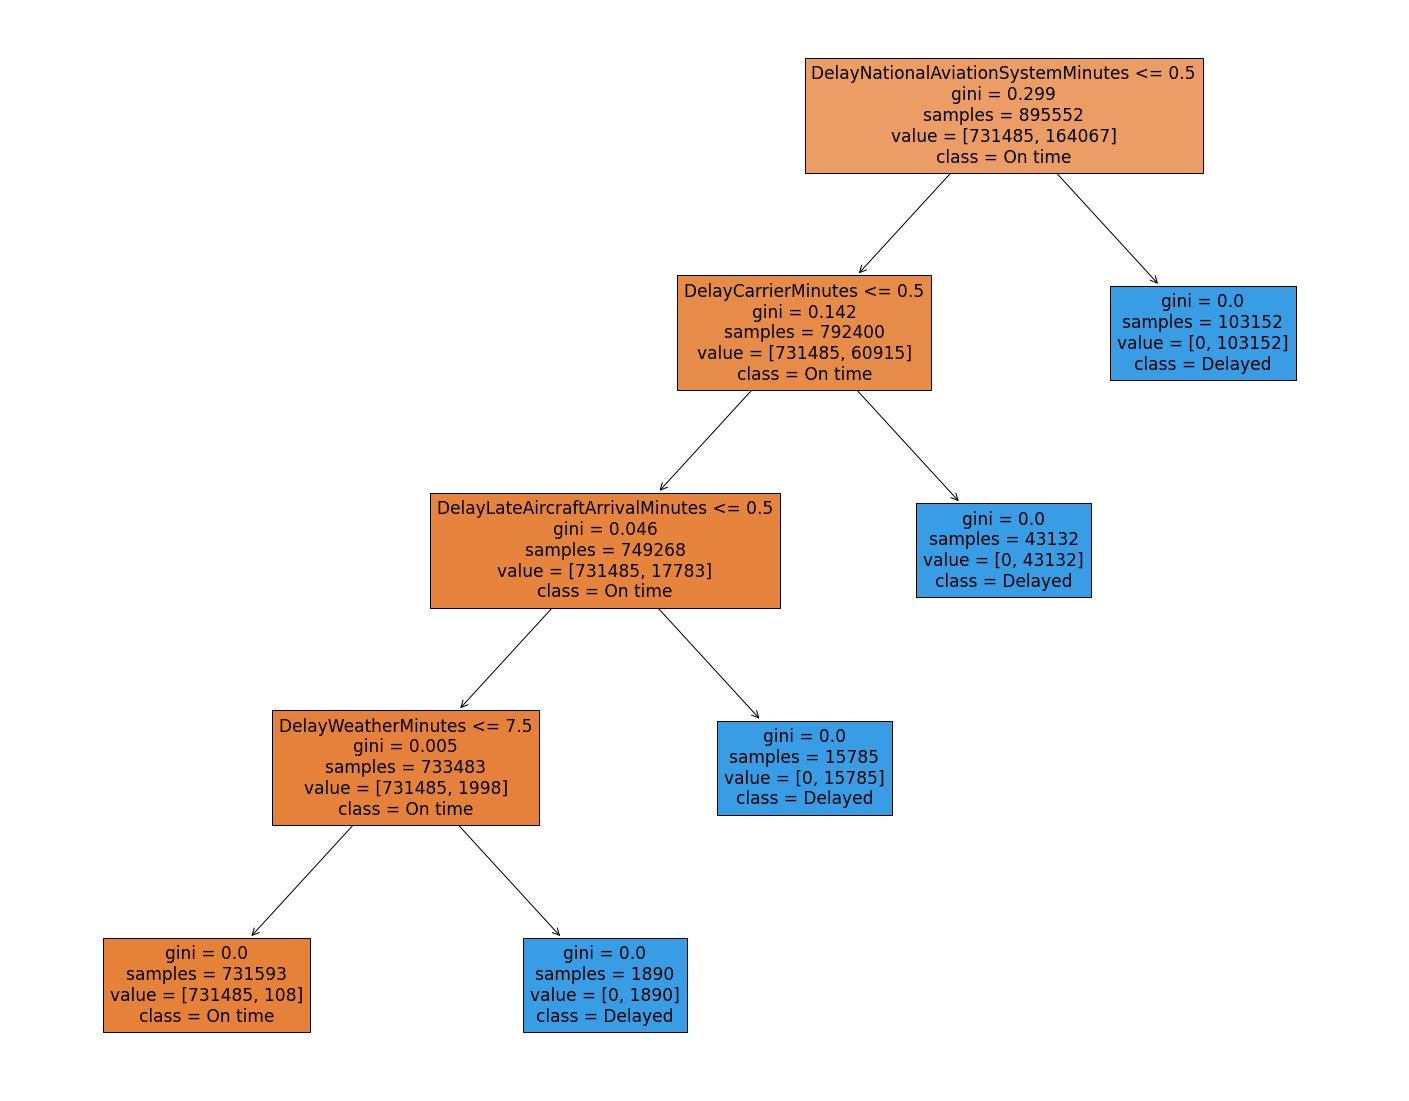

In [120]:
from sklearn import tree
target_values = ["On time", "Delayed"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=target_values,
                   filled=True)